# Self Driving Car Nanodegree Program

### Project-2 Advanced Lane Lines

Steps:

1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
2. Apply a distortion correction to raw images.
3. Use color transforms, gradients, etc., to create a thresholded binary image.
4. Apply a perspective transform to rectify binary image ("birds-eye view").
5. Detect lane pixels and fit to find the lane boundary.
6. Determine the curvature of the lane and vehicle position with respect to center.
7. Warp the detected lane boundaries back onto the original image.
8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [1]:
import numpy as np
import cv2
import pickle
import glob
import matplotlib.pyplot as plt
%matplotlib inline

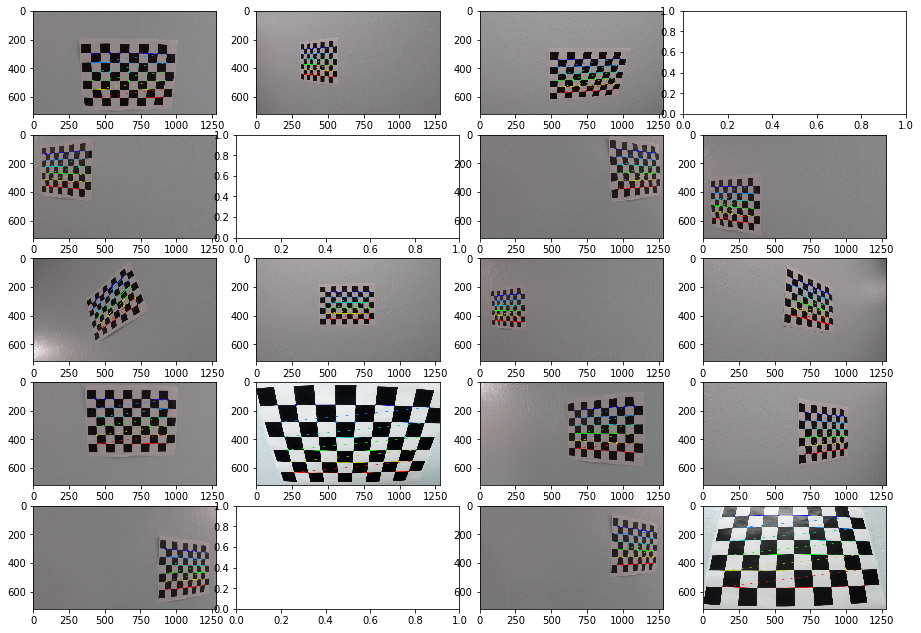

In [2]:
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)


objpoints = []
imgpoints = []

images = glob.glob('./camera_cal/calibration*.jpg')

fig, axs = plt.subplots(5,4, figsize=(16, 11))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        axs[i].imshow(img)
        fig.savefig('./output_images/test_camera_calibration' + str(i) + '.jpg')

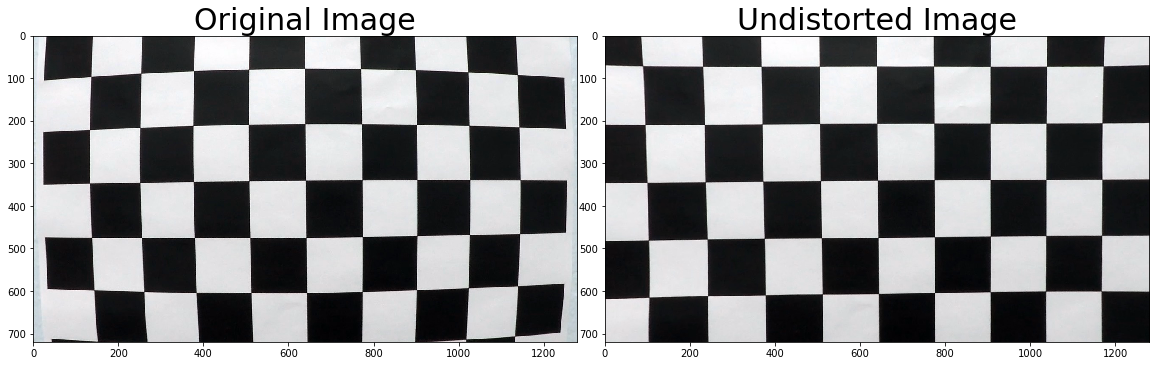

In [3]:
img = cv2.imread('./camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
dst = cv2.undistort(img, mtx, dist, None, mtx)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
f.savefig('./output_images/calibration1_undistored.jpg')

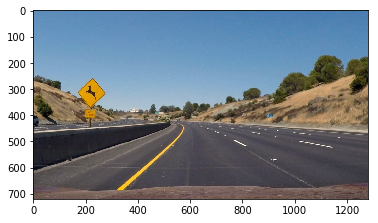

In [4]:
exampleimg = cv2.imread('./test_images/test2.jpg')
exampleimg = cv2.cvtColor(exampleimg, cv2.COLOR_BGR2RGB)
plt.imshow(exampleimg)

In [5]:
def undistort(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

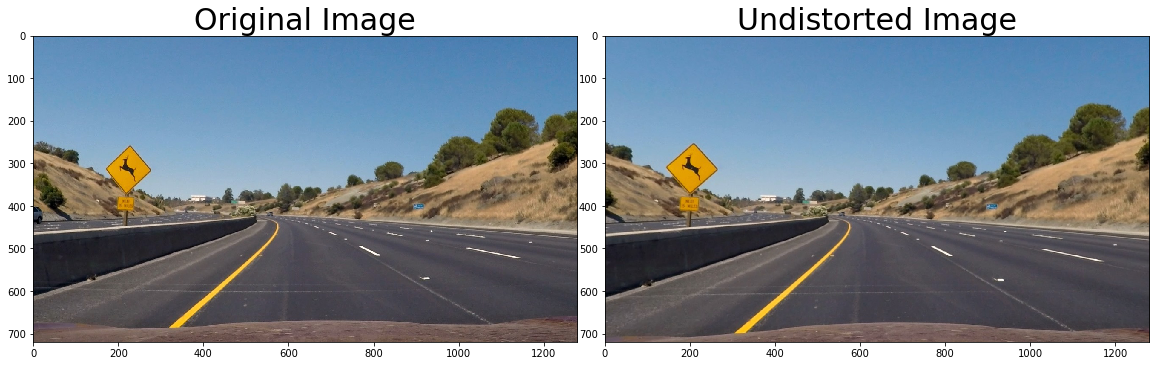

In [6]:
exampleimg_undistort = undistort(exampleimg)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleimg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(exampleimg_undistort)
ax2.set_title('Undistorted Image', fontsize=30)
f.savefig('./output_images/test2_undistorted.jpg')

In [7]:
def unwarp(img, src, dst):
    h,w = img.shape[:2]
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)
    return warped

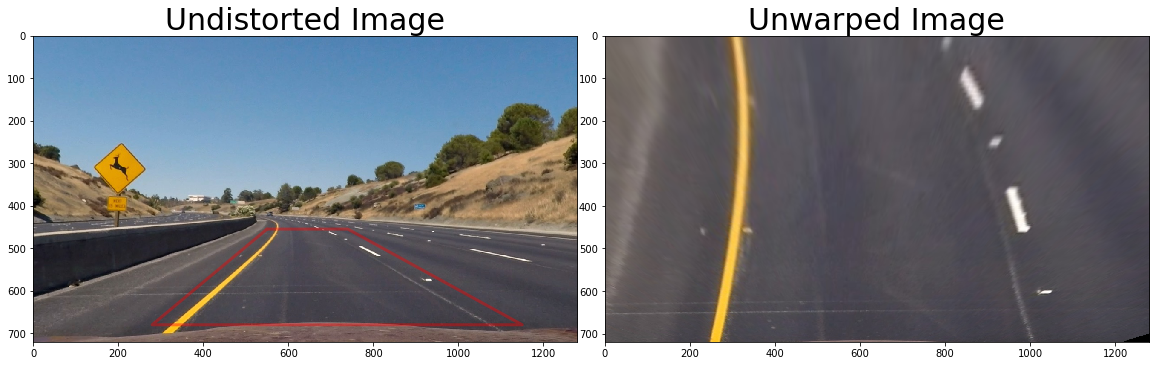

In [8]:
h,w = exampleimg_undistort.shape[:2]

src = np.float32([(550,455),
                  (740,455), 
                  (280,680), 
                  (1150,680)])
dst = np.float32([(200,0),
                  (w-200,0),
                  (200,h),
                  (w-200,h)])

exampleimg_unwarp = unwarp(exampleimg_undistort, src, dst)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleimg_undistort)
x = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
y = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]
ax1.plot(x, y, color='#ff0000', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
ax1.set_ylim([h,0])
ax1.set_xlim([0,w])
ax1.set_title('Undistorted Image', fontsize=30)
ax2.imshow(exampleimg_unwarp)
f.savefig('./output_images/test2_points.jpg')
ax2.set_title('Unwarped Image', fontsize=30)
f.savefig('./output_images/test2_unwarped.jpg')

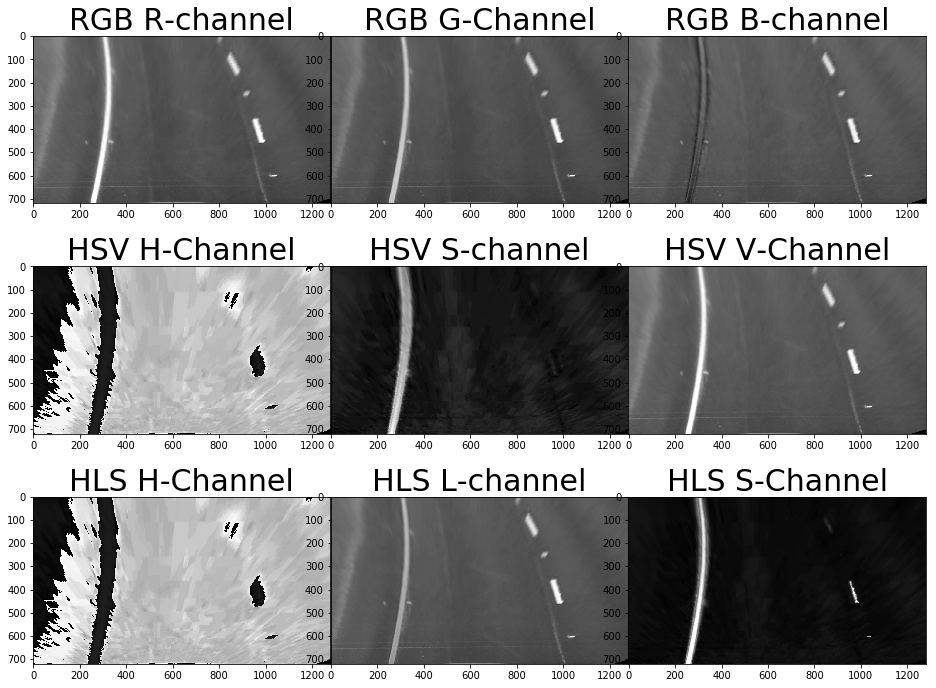

In [9]:
fig, axs = plt.subplots(3,3, figsize=(16, 12))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

exampleimg_unwarp_R = exampleimg_unwarp[:,:,0]
exampleimg_unwarp_G = exampleimg_unwarp[:,:,1]
exampleimg_unwarp_B = exampleimg_unwarp[:,:,2]

axs[0].imshow(exampleimg_unwarp_R, cmap='gray')
axs[0].set_title('RGB R-channel', fontsize=30)
fig.savefig('./output_images/test2_unwarped_R.jpg')
axs[1].imshow(exampleimg_unwarp_G, cmap='gray')
axs[1].set_title('RGB G-Channel', fontsize=30)
fig.savefig('./output_images/test2_unwarped_G.jpg')
axs[2].imshow(exampleimg_unwarp_B, cmap='gray')
axs[2].set_title('RGB B-channel', fontsize=30)
fig.savefig('./output_images/test2_unwarped_B.jpg')

exampleimg_unwarp_HSV = cv2.cvtColor(exampleimg_unwarp, cv2.COLOR_RGB2HSV)
exampleimg_unwarp_H = exampleimg_unwarp_HSV[:,:,0]
exampleimg_unwarp_S = exampleimg_unwarp_HSV[:,:,1]
exampleimg_unwarp_V = exampleimg_unwarp_HSV[:,:,2]

axs[3].imshow(exampleimg_unwarp_H, cmap='gray')
axs[3].set_title('HSV H-Channel', fontsize=30)
fig.savefig('./output_images/test2_unwarped_H.jpg')
axs[4].imshow(exampleimg_unwarp_S, cmap='gray')
axs[4].set_title('HSV S-channel', fontsize=30)
fig.savefig('./output_images/test2_unwarped_S.jpg')
axs[5].imshow(exampleimg_unwarp_V, cmap='gray')
axs[5].set_title('HSV V-Channel', fontsize=30)
fig.savefig('./output_images/test2_unwarped_V.jpg')

exampleimg_unwarp_HLS = cv2.cvtColor(exampleimg_unwarp, cv2.COLOR_RGB2HLS)
exampleimg_unwarp_H2 = exampleimg_unwarp_HLS[:,:,0]
exampleimg_unwarp_L = exampleimg_unwarp_HLS[:,:,1]
exampleimg_unwarp_S2 = exampleimg_unwarp_HLS[:,:,2]

axs[6].imshow(exampleimg_unwarp_H2, cmap='gray')
axs[6].set_title('HLS H-Channel', fontsize=30)
fig.savefig('./output_images/test2_unwarped_H2.jpg')
axs[7].imshow(exampleimg_unwarp_L, cmap='gray')
axs[7].set_title('HLS L-channel', fontsize=30)
fig.savefig('./output_images/test2_unwarped_L.jpg')
axs[8].imshow(exampleimg_unwarp_S2, cmap='gray')
axs[8].set_title('HLS S-Channel', fontsize=30)
fig.savefig('./output_images/test2_unwarped_S2.jpg')

In [10]:
def abs_sobel_thresh(img, orient='x', thresh_min=35, thresh_max=255):
    gray = (cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    sobel = cv2.Sobel(gray, cv2.CV_64F, orient=='x', orient=='y')
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sxbinary

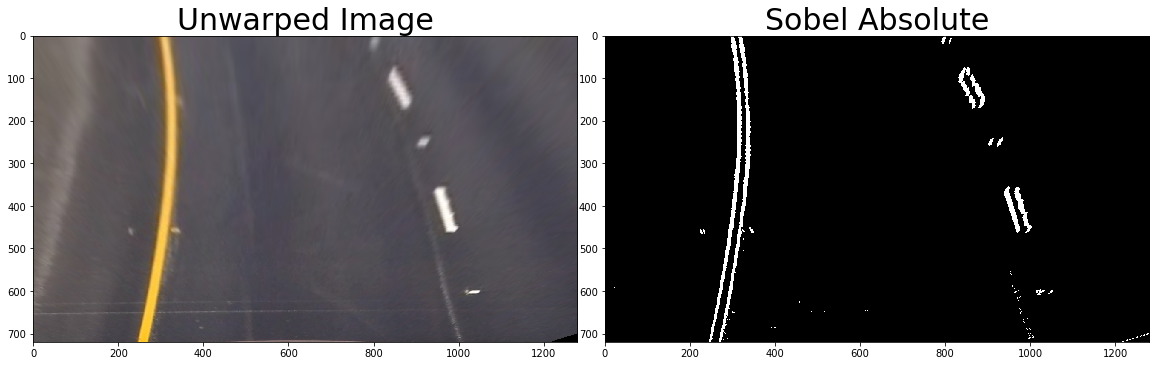

In [11]:
exampleimg_sobelAbs = abs_sobel_thresh(exampleimg_unwarp, 'x')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleimg_unwarp)
ax1.set_title('Unwarped Image', fontsize=30)
ax2.imshow(exampleimg_sobelAbs, cmap='gray')
ax2.set_title('Sobel Absolute', fontsize=30)
fig.savefig('./output_images/test2_unwarped_S_sobel.jpg')


In [12]:
def mag_thresh(img, sobel_kernel=25, mag_thresh=(25, 255)):
    gray = (cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    mag_sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
    scaled_sobel = np.uint8(255*mag_sobel/np.max(mag_sobel))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    return sxbinary

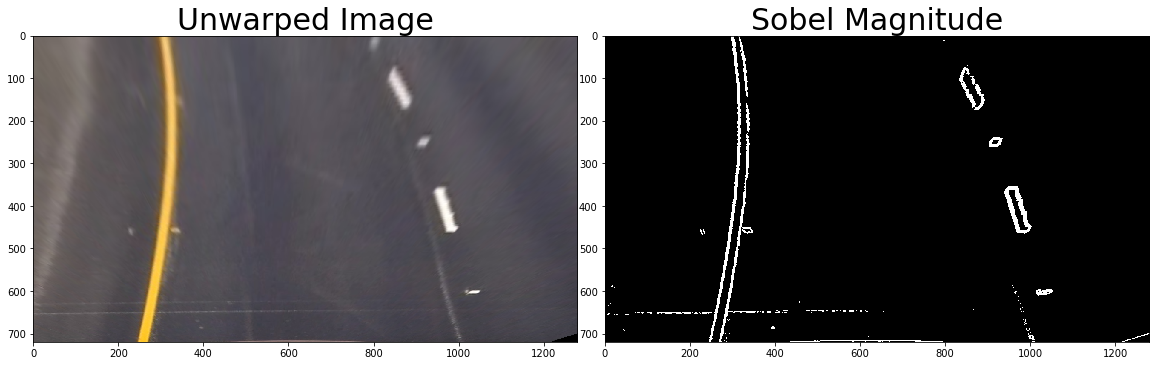

In [13]:
exampleimg_sobelMag = mag_thresh(exampleimg_unwarp)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleimg_unwarp)
ax1.set_title('Unwarped Image', fontsize=30)
ax2.imshow(exampleimg_sobelMag, cmap='gray')
ax2.set_title('Sobel Magnitude', fontsize=30)
f.savefig('./output_images/test2_unwarped_S_sobelMag.jpg')

In [14]:
def dir_thresh(img, sobel_kernel=15, thresh=(0.01, 0.7)):    
    gray = (cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    grad_dir = np.arctan2(abs_sobely, abs_sobelx)
    binary_output =  np.zeros_like(grad_dir)
    binary_output[(grad_dir >= thresh[0]) & (grad_dir <= thresh[1])] = 1
    return binary_output

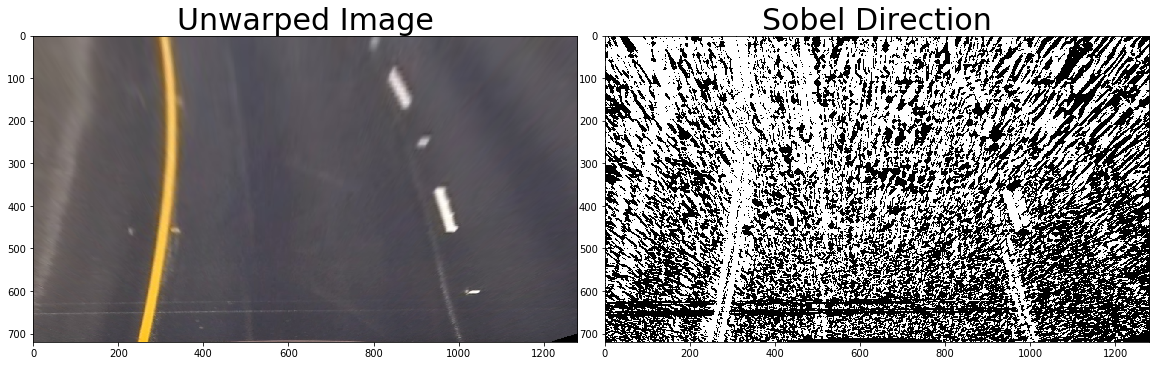

In [15]:
exampleimg_sobelDir = dir_thresh(exampleimg_unwarp)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleimg_unwarp)
ax1.set_title('Unwarped Image', fontsize=30)
ax2.imshow(exampleimg_sobelDir, cmap='gray')
ax2.set_title('Sobel Direction', fontsize=30)
f.savefig('./output_images/test2_unwarped_S_sobelDir.jpg')

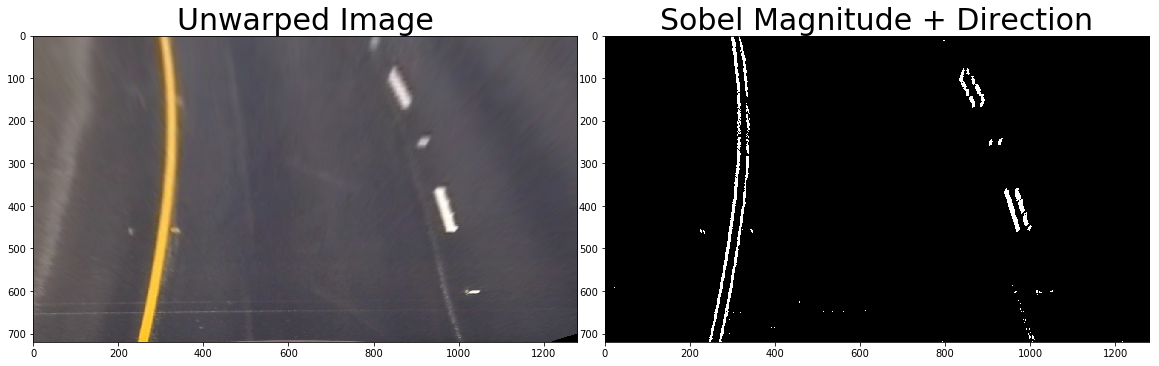

In [16]:
exampleimg_sobelMag2 = mag_thresh(exampleimg_unwarp)
exampleimg_sobelDir2 = dir_thresh(exampleimg_unwarp)
combined = np.zeros_like(exampleimg_sobelMag2)
combined[((exampleimg_sobelMag2 == 1) & (exampleimg_sobelDir2 == 1))] = 1
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleimg_unwarp)
ax1.set_title('Unwarped Image', fontsize=30)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Sobel Magnitude + Direction', fontsize=30)
f.savefig('./output_images/test2_unwarped_S_sobelCombined.jpg')

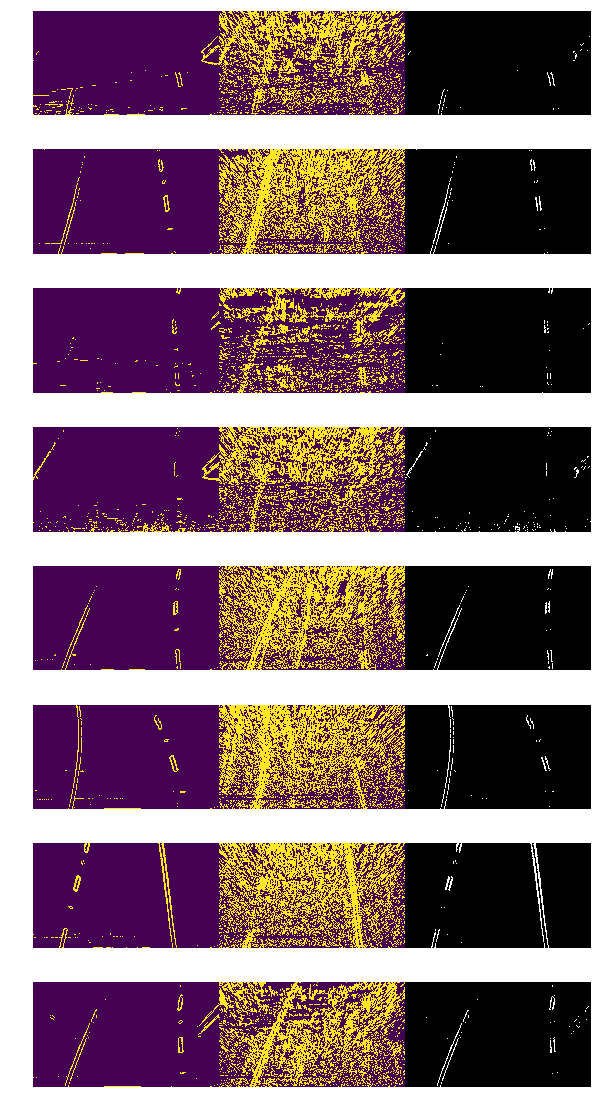

In [17]:
images = glob.glob('./test_images/*.jpg')
                                          
# Set up plot
fig, axs = plt.subplots(len(images),3, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
                  
i = 0
for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_mag = mag_thresh(unwarp(undistort(img), src, dst))
    img_dir = dir_thresh(unwarp(undistort(img), src, dst))
    img = unwarp(undistort(img), src, dst)
    img_l_channel = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)[:,:,1]
    img_s_channel = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)[:,:,1]
    
    img_combined = np.zeros_like(img_mag)
    img_combined[((img_mag == 1) & (img_dir == 1))] = 1
    axs[i].imshow(img_mag)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(img_dir)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(img_combined, cmap='gray')
    axs[i].axis('off')
    i += 1

In [18]:
#https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html
from ipywidgets import interact, interactive, fixed

images = glob.glob('./test_images/*.jpg')

#TO detect white line use l-channel threshold and to detect yellw line use h-channel threshold
#I took the help for thresholds from here : http://aishack.in/tutorials/tracking-colored-objects-opencv/

def hls_lthresh(img, thresh=(200, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    binary_output = np.zeros_like(hls[:,:,1])
    binary_output[(hls[:,:,1] > thresh[0]) & (hls[:,:,1] <= thresh[1])] = 1
    return binary_output

def hls_hthresh(img, thresh=(20, 30)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    binary_output = np.zeros_like(hls[:,:,0])
    binary_output[(hls[:,:,0] > thresh[0]) & (hls[:,:,0] <= thresh[1])] = 1
    return binary_output

def lab_bthresh(img, thresh=(190, 255)):
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    lab_b = lab[:,:,2]
    if np.max(lab_b) > 175:
        lab_b = lab_b*(255/np.max(lab_b))
    binary_output = np.zeros_like(lab_b)
    binary_output[((lab_b > thresh[0]) & (lab_b <= thresh[1]))] = 1
    return binary_output

def update():
        f, axes = plt.subplots(len(images), 3, figsize=(10,20))
        f.subplots_adjust(hspace = .2, wspace=.001)
        ax = axes.ravel()
        i=0
        for image in images:
            img = cv2.imread(image)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_unwarp = unwarp(undistort(img), src, dst)
            exampleimg_hThresh = hls_hthresh(img_unwarp)
            exampleimg_lThresh = hls_lthresh(img_unwarp)
            exampleimg_bthresh = lab_bthresh(img_unwarp)
            img_combo = np.zeros_like(exampleimg_lThresh)
            img_combo[((exampleimg_bthresh == 1) | (exampleimg_lThresh == 1))] = 1 
            ax[i].imshow(img)
            axs[i].axis('off')
            i += 1
            ax[i].imshow(img_unwarp)
            axs[i].axis('off')
            i += 1
            ax[i].imshow(img_combo, cmap='gray')
            axs[i].axis('off')
            i += 1

interact(update)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.update()>

In [19]:
def sliding_window_polyfit(img):
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    midpoint = np.int(histogram.shape[0]//2)
    
    quarter_point = np.int(midpoint//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    
    nwindows = 10
    window_height = np.int(img.shape[0]/nwindows)
    
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    leftx_current = leftx_base
    rightx_current = rightx_base
    
    margin = 70
    minpix = 40
    
    left_lane_inds = []
    right_lane_inds = []
    rectangle_data = []

    for window in range(nwindows):
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        rectangle_data.append((win_y_low, win_y_high, win_xleft_low, win_xleft_high, win_xright_low, win_xright_high))
        
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    left_fit, right_fit = (None, None)
    if len(leftx) != 0:
        left_fit = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit = np.polyfit(righty, rightx, 2)
    
    visualdata = (rectangle_data, histogram)
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds, visualdata

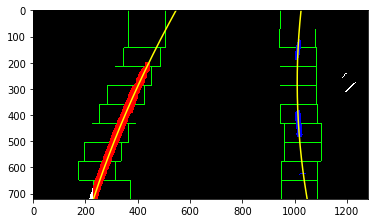

In [20]:
img = cv2.imread('./test_images/test6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_unwarp = unwarp(undistort(img), src, dst)
exampleimg_bThresh = lab_bthresh(img_unwarp)
exampleimg_lThresh = hls_lthresh(img_unwarp)
img_example = np.zeros_like(exampleimg_lThresh)
img_example[((exampleimg_bThresh == 1) | (exampleimg_lThresh == 1))] = 1 
left_fit, right_fit, left_lane_inds, right_lane_inds, visualdata = sliding_window_polyfit(img_example)

rectangles = visualdata[0]
histogram = visualdata[1]

out_img = np.uint8(np.dstack((img_example, img_example, img_example))*255)

ploty = np.linspace(0, img_example.shape[0]-1, img_example.shape[0] )
try: 
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
except TypeError:
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
for rect in rectangles:
    cv2.rectangle(out_img,(rect[2],rect[0]),(rect[3],rect[1]),(0,255,0), 2) 
    cv2.rectangle(out_img,(rect[4],rect[0]),(rect[5],rect[1]),(0,255,0), 2) 
nonzero = img_example.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]


plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.savefig('./output_images/test2_unwarped_S_sobelCombined_window_polyfit.jpg')

In [21]:
def polyfit_using_prev_fit(binary_warped, left_fit_prev, right_fit_prev):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] - margin)) & 
                      (nonzerox < (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] - margin)) & 
                       (nonzerox < (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] + margin)))  

    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    left_fit_new, right_fit_new = (None, None)
    if len(leftx) != 0:
        left_fit_new = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit_new = np.polyfit(righty, rightx, 2)
    return left_fit_new, right_fit_new, left_lane_inds, right_lane_inds

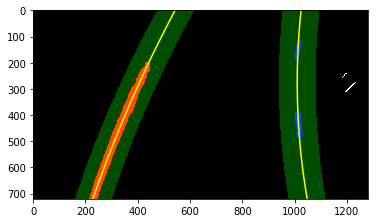

In [22]:
exampleimg3 = img_example   
margin = 70

left_fit2, right_fit2, left_lane_inds2, right_lane_inds2 = polyfit_using_prev_fit(exampleimg3, left_fit, right_fit)

ploty = np.linspace(0, exampleimg3.shape[0]-1, exampleimg3.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
left_fitx2 = left_fit2[0]*ploty**2 + left_fit2[1]*ploty + left_fit2[2]
right_fitx2 = right_fit2[0]*ploty**2 + right_fit2[1]*ploty + right_fit2[2]

out_img = np.uint8(np.dstack((exampleimg3, exampleimg3, exampleimg3))*255)
window_img = np.zeros_like(out_img)

nonzero = exampleimg3.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds2], nonzerox[left_lane_inds2]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds2], nonzerox[right_lane_inds2]] = [0, 0, 255]

left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx2, ploty, color='yellow')
plt.plot(right_fitx2, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.savefig('./output_images/test2_unwarped_S_sobelCombined_prevfit_polyfit.jpg')

In [25]:
def calc_curv_rad_and_center_dist(bin_img, l_fit, r_fit, l_lane_inds, r_lane_inds):
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    left_curverad, right_curverad, center_dist = (0, 0, 0)
    h = bin_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)
  
    nonzero = bin_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    leftx = nonzerox[l_lane_inds]
    lefty = nonzeroy[l_lane_inds] 
    rightx = nonzerox[r_lane_inds]
    righty = nonzeroy[r_lane_inds]
    
    if len(leftx) != 0 and len(rightx) != 0:
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    if r_fit is not None and l_fit is not None:
        car_position = bin_img.shape[1]/2
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        lane_center_position = (r_fit_x_int + l_fit_x_int) /2
        center_dist = (car_position - lane_center_position)*xm_per_pix
    return left_curverad, right_curverad, center_dist

In [26]:
rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(img_example, left_fit, right_fit, left_lane_inds, right_lane_inds)

print('Radius of curvature for example:', rad_l, 'm,', rad_r, 'm')
print('Distance from lane center for example:', d_center, 'm')

Radius of curvature for example: 1063.79963875 m, 855.081282363 m
Distance from lane center for example: 0.00315621778127 m


In [27]:
def draw_lane(original_img, binary_img, l_fit, r_fit, Minv):
    new_img = np.copy(original_img)
    if l_fit is None or r_fit is None:
        return original_img
    warp_zero = np.zeros_like(binary_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = binary_img.shape
    ploty = np.linspace(0, h-1, h)
    left_fitx = l_fit[0]*ploty**2 + l_fit[1]*ploty + l_fit[2]
    right_fitx = r_fit[0]*ploty**2 + r_fit[1]*ploty + r_fit[2]
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,255), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=15)

    newwarp = cv2.warpPerspective(color_warp, Minv, (w, h)) 
    result = cv2.addWeighted(new_img, 1, newwarp, 0.5, 0)
    return result

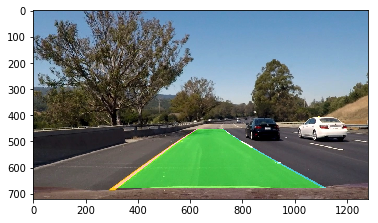

In [28]:
exampleimg_out1 = draw_lane(img, img_example, left_fit, right_fit, cv2.getPerspectiveTransform(dst, src))
plt.imshow(exampleimg_out1)
plt.savefig('./output_images/test2_drawn_lanes.jpg')

In [29]:
def draw_data(original_img, rad_l, rad_r, center_dist):
    new_img = np.copy(original_img)
    h = new_img.shape[0]
    font = cv2.FONT_HERSHEY_DUPLEX
    text_l = 'Left Curve radius: ' + '{:04.2f}'.format(rad_l) + 'm'
    text_r = 'Right Curve radius: ' + '{:04.2f}'.format(rad_r) + 'm'
    cv2.putText(new_img, text_l, (40,70), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    cv2.putText(new_img, text_r, (40,120), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    abs_center_dist = abs(center_dist)
    text = '{:04.3f}'.format(abs_center_dist) + 'm ' + direction + ' of center'
    cv2.putText(new_img, text, (40,170), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    return new_img

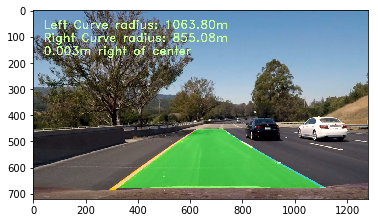

In [30]:
exampleimg_out2 = draw_data(exampleimg_out1, rad_l, rad_r, d_center)
plt.imshow(exampleimg_out2)
plt.savefig('./output_images/test2_drawn_data.jpg')

In [31]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        
        
    def add(self, fit, inds):
        if fit is not None and len(fit) == 3:
            self.detected = True
            self.current_fit.append(fit)
            if len(self.current_fit) > 5:
                self.current_fit = self.current_fit[len(self.current_fit)-5:]
            self.best_fit = np.average(self.current_fit, axis=0)
        else:
            self.detected = False
            if len(self.current_fit) > 0:
                self.current_fit = self.current_fit[:len(self.current_fit)-1]
            if len(self.current_fit) > 0:
                self.best_fit = np.average(self.current_fit, axis=0)

In [32]:
def pipeline(img):
    new_img = np.copy(img)
    img_undistort = undistort(img)
    img_unwarp = unwarp(img_undistort, src, dst)
    
    img_bthresh = lab_bthresh(img_unwarp)
    img_lthresh = hls_lthresh(img_unwarp)
    combined = np.zeros_like(img_lthresh)
    combined[((img_bthresh == 1) | (img_lthresh == 1))] = 1
    
    
    if not left_line.detected or not right_line.detected:
        left_fit, right_fit, left_lane_inds, right_lane_inds, visualdata = sliding_window_polyfit(combined)
    else:
        left_fit, right_fit, left_lane_inds, right_lane_inds = polyfit_using_prev_fit(combined, left_line.best_fit, right_line.best_fit)
        

    left_line.add(left_fit, left_lane_inds)
    right_line.add(right_fit, right_lane_inds)

    if left_line.best_fit is not None and right_line.best_fit is not None:
        rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(combined, left_line.best_fit, right_line.best_fit, left_lane_inds, right_lane_inds)
        img_output = draw_lane(img_undistort, combined, left_line.best_fit, right_line.best_fit, cv2.getPerspectiveTransform(dst, src))
        output_img = draw_data(img_output, rad_l, rad_r, d_center)
    else:
        output_img = new_img
   
    return output_img
    


In [33]:
left_line = Line()
right_line = Line()

In [33]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

project_video_output = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
lane_clip = clip1.fl_image(pipeline) #NOTE: this function expects color images!!
%time lane_clip.write_videofile(project_video_output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [05:21<00:00,  3.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 3min 7s, sys: 3.01 s, total: 3min 10s
Wall time: 5min 24s
